In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
from google.colab import files
uploaded = files.upload()

Saving Transactions PC bank_cleaned1.xlsx to Transactions PC bank_cleaned1.xlsx


Firstly, I used excel to add 2 cols (year and month
)

In [23]:
df1 = pd.read_excel('Transactions PC bank_cleaned1.xlsx', sheet_name= 'month1') 
df2 = pd.read_excel('Transactions PC bank_cleaned1.xlsx', sheet_name= 'month2') 
df3 = pd.read_excel('Transactions PC bank_cleaned1.xlsx', sheet_name= 'month3') 

Merge 3 tables

In [24]:
frames = [df1, df2, df3]
df = pd.concat(frames)

In [26]:
df.head()

,ACCOUNT_ID,Month_new,Year_new,MONTH,TRANSACTION_CATEGORY,TRANSACTION_AMOUNT,CURRENCY_CODE,DEBIT_CREDIT_INDICATOR
0,144,1,2014,201401,1.0,29.75,124.0,D
1,144,1,2014,201401,19.0,1600.00,124.0,C
2,144,1,2014,201401,1.0,5.00,124.0,D
3,144,1,2014,201401,1.0,19.99,124.0,D
4,144,1,2014,201401,1.0,8.73,124.0,D


1.	Net transaction amount by currency by category by month

In [36]:
df.groupby(['Month_new']).sum().TRANSACTION_AMOUNT

Month_new
1    44201.41
2    43504.95
3    74234.76
Name: TRANSACTION_AMOUNT, dtype: float64

**2.	# of transactions by currency by category by month**

In [37]:
df.groupby(['Month_new']).count().TRANSACTION_AMOUNT

Month_new
1    500
2    500
3    500
Name: TRANSACTION_AMOUNT, dtype: int64

**3.	# of unique customers with a transaction by month**

In [45]:
# df.groupby(['Month_new', 'ACCOUNT_ID']).agg('count')
df.groupby('Month_new').ACCOUNT_ID.nunique()

Month_new
1    303
2    249
3    175
Name: ACCOUNT_ID, dtype: int64

**4.	# of unique customers with a transaction for the entire 3 months period**

In [46]:
df.ACCOUNT_ID.nunique()

672

**5.	# of customer with a transaction in 1 month, 2 months or 3 months**



In [58]:
c_num = df.groupby('Month_new').ACCOUNT_ID.nunique()
c_num

Month_new
1    303
2    249
3    175
Name: ACCOUNT_ID, dtype: int64

In [63]:
print('# of customer with a transaction in 1 month', c_num[1] )
print('# of customer with a transaction in 2 months', c_num[1] + c_num[2]  )
print('# of customer with a transaction in 3 months', c_num[1] + c_num[2] + c_num[3]  )

# of customer with a transaction in 1 month 303
# of customer with a transaction in 2 months 552
# of customer with a transaction in 3 months 727


**6.	Average amount spent by customer**



In [68]:
df.head()

,ACCOUNT_ID,Month_new,Year_new,MONTH,TRANSACTION_CATEGORY,TRANSACTION_AMOUNT,CURRENCY_CODE,DEBIT_CREDIT_INDICATOR
0,144,1,2014,201401,1.0,29.75,124.0,D
1,144,1,2014,201401,19.0,1600.00,124.0,C
2,144,1,2014,201401,1.0,5.00,124.0,D
3,144,1,2014,201401,1.0,19.99,124.0,D
4,144,1,2014,201401,1.0,8.73,124.0,D


In [70]:
df.groupby('ACCOUNT_ID').agg({'TRANSACTION_AMOUNT':np.average})

,TRANSACTION_AMOUNT
ACCOUNT_ID,
140,966.730000
141,19.240000
143,713.000000
144,250.810000
149,2439.900000
...,...
3071633,26.616667
3071653,500.000000
3071919,189.000000


**7.	Average number of transactions by customer**

In [75]:
df.head()

,ACCOUNT_ID,Month_new,Year_new,MONTH,TRANSACTION_CATEGORY,TRANSACTION_AMOUNT,CURRENCY_CODE,DEBIT_CREDIT_INDICATOR
0,144,1,2014,201401,1.0,29.75,124.0,D
1,144,1,2014,201401,19.0,1600.00,124.0,C
2,144,1,2014,201401,1.0,5.00,124.0,D
3,144,1,2014,201401,1.0,19.99,124.0,D
4,144,1,2014,201401,1.0,8.73,124.0,D


In [78]:
df.TRANSACTION_AMOUNT.sum()/df.ACCOUNT_ID.nunique()

240.98380952380953

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


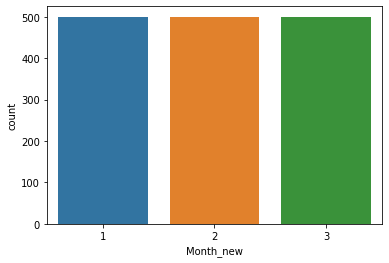

In [80]:
sns.countplot(df['Month_new'])